In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.linalg
import random as rd
import cmath
from IPython.display import clear_output
%matplotlib inline
plt.rcParams['figure.dpi'] = 80

In [21]:
N = 12 # number of 1/2 spin particles (must be even)

space = np.array(np.zeros(N))
vec = np.zeros(N)
while np.sum(vec) != N:
    i = 0
    while vec[i] != 0 and  i < len(vec):
        vec[i] = 0
        i += 1
    if i < len(vec):
        vec[i] = 1
    if np.sum(vec) == N/2:
        space = np.vstack((space, vec))
space = np.delete(space, 0, 0)
space = space.tolist()
# print(space)
# print(type(space))

In [13]:
print(space)

[[1.0, 1.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0], [0.0, 1.0, 1.0, 0.0], [1.0, 0.0, 0.0, 1.0], [0.0, 1.0, 0.0, 1.0], [0.0, 0.0, 1.0, 1.0]]


In [22]:
Hj = np.zeros((len(space), len(space)))

for m in space:
    clear_output(wait=True)
    for n in space:
#         print(m, n)
#         print(" ")
        entry = 0
        if np.array_equal(m, n) == True:
            i = 0
            while i < len(m)-1:
                if m[i] == m[i+1]:
                    entry += 1/4
                if m[i] != m[i+1]:
                    entry -= 1/4
                i += 1
            if i == len(m) - 1:
                if m[i] == m[0]:
                    entry += 1/4
                if m[i] != m[0]:
                    entry -= 1/4
            Hj[space.index(m), space.index(n)] = entry
        else:
            i = 0
            while i < len(n)-1:    
                n_fake = np.copy(n)
                if n_fake[i] == 0 and n_fake[i+1] == 1:
                    n_fake[i] = 1
                    n_fake[i+1] = 0
                elif n_fake[i] == 1 and n_fake[i+1] == 0:
                    n_fake[i] = 0
                    n_fake[i+1] = 1
                if np.array_equal(m , n_fake):
                    Hj[space.index(m), space.index(n)] = 1/2
                i += 1
            if i == len(n)-1:
                n_fake = np.copy(n)
                if n_fake[i] == 0 and n_fake[0] == 1:
                    n_fake[i] = 1
                    n_fake[0] = 0
                elif n_fake[i] == 1 and n_fake[0] == 0:
                    n_fake[i] = 0
                    n_fake[0] = 1
                if np.array_equal(m , n_fake):
                    Hj[space.index(m), space.index(n)] = 1/2
    print("Current progress:",np.round((space.index(m)-1)/len(space)*100, 2), "%")
    
# print(space)
# print(Hj)

Current progress: 99.78 %


In [53]:
print(Hj)

[[2.  0.5 0.  ... 0.  0.  0. ]
 [0.5 1.  0.5 ... 0.  0.  0. ]
 [0.  0.5 1.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 1.  0.5 0. ]
 [0.  0.  0.  ... 0.5 1.  0.5]
 [0.  0.  0.  ... 0.  0.5 2. ]]


In [349]:
Hn = np.zeros((len(space), len(space)))
delta = 0.1

for m in space:
    clear_output(wait=True)
    for n in space:
        entry = 0
        if np.array_equal(m, n) == True:
            i = 0
            while i <= len(m)-1:
                if m[i] == 1:
                    entry += np.random.normal(0.0, delta)*1/4
                if m[i] == 0:
                    entry -= np.random.normal(0.0, delta)*1/4
                i += 1
            Hn[space.index(m), space.index(n)] = entry
    print("Current progress:",np.round((space.index(m)-1)/len(space)*100, 2), "%")
            
# print(Hn)

Current progress: 99.78 %


In [350]:
H = Hj-Hn
# print(H)
eig_array = np.linalg.eigvals(H)
# print(eig_array)
eig_array = np.sort(eig_array)

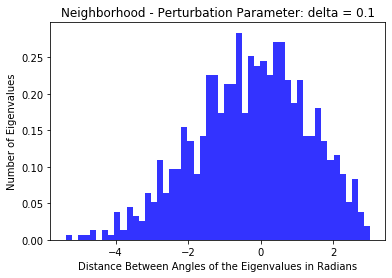

In [332]:
plt.hist(eig_array, 50, facecolor='blue', alpha=0.8, density=True)
plt.xlabel('Distance Between Angles of the Eigenvalues in Radians')
plt.ylabel('Number of Eigenvalues')
plt.title('Neighborhood - Perturbation Parameter: delta = '+str(delta))
plt.show()

In [352]:
print(len(eig_neighborhood))

14784


In [295]:
eig_neighborhood = np.array([])

In [351]:
# eig_neighborhood = ([])
i = 0
while i < len(eig_array)-1:
    eig_neighborhood = np.append(eig_neighborhood, (eig_array[i+1]-eig_array[i]))
    i += 1
if i == len(eig_array)-1:
    eig_neighborhood = np.append(eig_neighborhood, (eig_array[i]-eig_array[0]))
# eig_neighborhood = np.sort(eig_neighborhood)

In [353]:
r_array = ([])
i = 0
while i < len(eig_neighborhood)-1:
#     print(eig_neighborhood[i+1], eig_neighborhood[i])
#     print(min(eig_neighborhood[i+1], eig_neighborhood[i]), max(eig_neighborhood[i+1], eig_neighborhood[i]))
#     print(min(eig_neighborhood[i+1], eig_neighborhood[i])/max(eig_neighborhood[i+1], eig_neighborhood[i]))
    r_array = np.append(r_array, min(eig_neighborhood[i+1], eig_neighborhood[i])/max(eig_neighborhood[i+1], eig_neighborhood[i]))
    i += 1
if i == len(eig_neighborhood)-1:
    r_array = np.append(r_array, min(eig_neighborhood[i], eig_neighborhood[0])/max(eig_neighborhood[i], eig_neighborhood[0]))

In [34]:
print(np.amax(r_array))
print(np.amin(r_array))
print(len(np.arange(0.0, float(np.amax(r_array)), float(np.amin(r_array)))))

0.9972646891105466
0.00869653410562297
115


In [354]:
d = np.arange(0.0, float(np.amax(r_array)), float(np.amax(r_array))/100)
# d = np.arange(0, 5, 0.1)
Fit_n = [2/((1+r)**2) for r in d]
Fit_c = [27/4*((r+r**2)/((1+r+r**2)**(5/2))) for r in d]

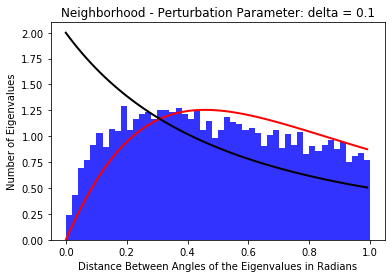

In [357]:
plt.hist(r_array, 50, facecolor='blue', alpha=0.8, density=True)
plt.plot(d, Fit_c, lw=2, color="red")
plt.plot(d, Fit_n, lw=2, color="black")
plt.xlabel('Distance Between Angles of the Eigenvalues in Radians')
plt.ylabel('Number of Eigenvalues')
plt.title('Neighborhood - Perturbation Parameter: delta = '+str(delta))
plt.show()

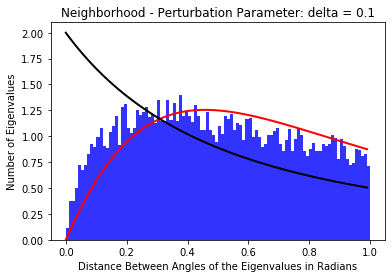

In [356]:
plt.hist(r_array, 100, facecolor='blue', alpha=0.8, density=True)
plt.plot(d, Fit_c, lw=2, color="red")
plt.plot(d, Fit_n, lw=2, color="black")
plt.xlabel('Distance Between Angles of the Eigenvalues in Radians')
plt.ylabel('Number of Eigenvalues')
plt.title('Neighborhood - Perturbation Parameter: delta = '+str(delta))
plt.show()